### **Exercise: Multiclass Classification with Logistic Regression**

### Problem Statement

* The goal of this exercise is to build a machine learning model using Logistic Regression to classify wines into one of three different types. 

* You will use the **Wine Recognition Dataset**, which contains the results of a chemical analysis of wines grown in the same region in Italy, but derived from three different cultivars.

* Each sample in the dataset has 13 features, such as alcohol content, malic acid, and color intensity. Your task is to use these features to train a model that can accurately predict the type (class) of a wine.

* Follow the steps below to complete the exercise and build your classification model.

### Step 1: Import Libraries

First, import all the necessary libraries. 

We'll need `pandas` for data handling, `numpy` for numerical operations, `matplotlib` and `seaborn` for visualization, and several modules from `sklearn` for our machine learning tasks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_wine

### Step 2: Load and Explore the Dataset

Load the Wine dataset from `sklearn.datasets` and inspect its contents. Create a pandas DataFrame to make the data easier to work with. Take a look at the features and target classes.

In [ ]:
# Load the dataset
wine = load_wine()

In [3]:
# dir() function shows all the attributes and methods of the object passed to it.
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
# Create a DataFrame with features and target
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

In [5]:
# Display the first few rows of the DataFrame
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# Display the target class names
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
# Check the shape of the dataset
wine_df.shape

(178, 14)

### Step 3: Visualize the Data

* Visualization helps us understand how well the different classes are separated by the features. 

* A `PairPlot` from `seaborn` is a great way to visualize pairwise relationships for a small number of features. 

* Let's visualize a few key features to see the separation of the three wine types.

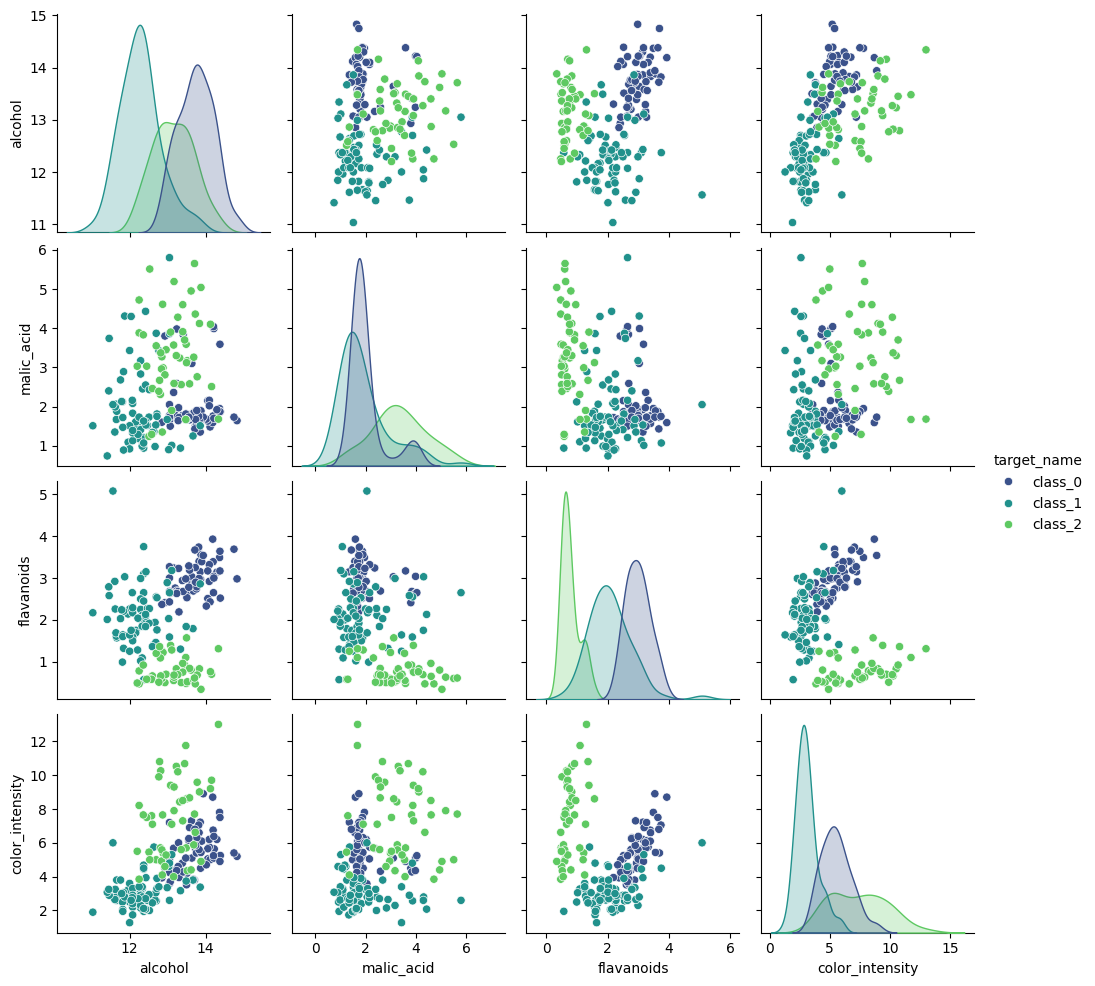

In [8]:
# Select a few features for visualization
selected_features = ['alcohol', 'malic_acid', 'flavanoids', 'color_intensity']

# Add the target names as a new column for visualization
wine_df['target_name'] = wine_df['target'].apply(lambda x: wine.target_names[x])

# Create a PairPlot
sns.pairplot(wine_df, hue='target_name', vars=selected_features, palette='viridis')
plt.show()

### Step 4: Split Data into Training and Testing Sets

* To evaluate the model's performance on unseen data, we must split our dataset into a training set and a testing set. 

* We will use an 80/20 split, with 80% of the data for training and 20% for testing.

In [9]:
# Define features (X) and target (y)
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (142, 13)
X_test shape: (36, 13)
y_train shape: (142,)
y_test shape: (36,)


### Step 5: Create and Train Logistic Regression Model

* Now, instantiate the `LogisticRegression` model and train it using the training data. 

* The `fit()` method is what trains the model by finding the best weights for each feature.

In [10]:
# Create a Logistic Regression model instance
# Use a higher max_iter to ensure convergence due to the nature of the dataset
model = LogisticRegression(max_iter=5000)

# Train the model
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


### Step 6: Evaluate Model Performance

* After training, we evaluate our model on the testing set. 
* We will use the following metrics:
  - *Accuracy Score*: The proportion of correctly classified instances.
  - *Confusion Matrix*: A table showing the number of correct and incorrect predictions for each class.
  - *Classification Report*: Provides a detailed breakdown of precision, recall, and F1-score for each class.

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 1.0000


In [13]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

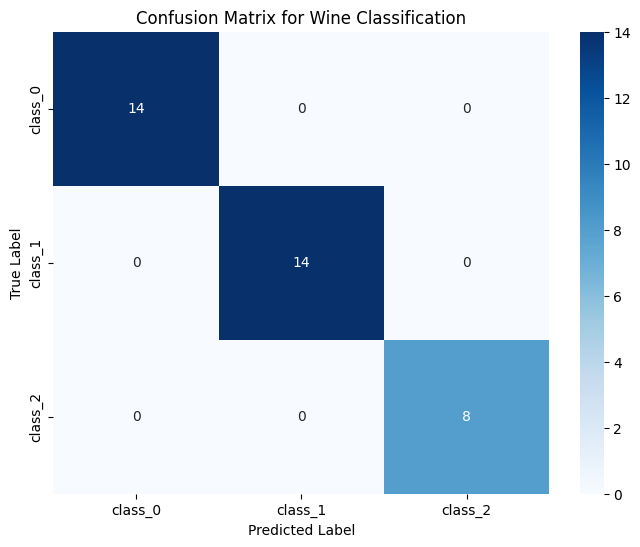

In [14]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Wine Classification')
plt.show()

In [15]:
# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Classification Report:

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Step 7: Make Predictions for New Data

* Finally, let's use our trained model to make a prediction on a new, hypothetical data point. 

* The data point should have 13 feature values, just like the training data.

In [16]:
# Create a new data point (a single wine sample with 13 features)
# This is a hypothetical sample with feature values similar to one of the wine types
new_wine_sample = np.array([[12.5, 3.8, 2.3, 20.0, 100.0, 3.0, 2.5, 0.3, 1.5, 6.0, 1.0, 3.0, 900.0]])

# Predict the class of the new sample
predicted_class = model.predict(new_wine_sample)
predicted_wine_type = wine.target_names[predicted_class[0]]

print(f"The predicted type for the new wine sample is: {predicted_wine_type}")

The predicted type for the new wine sample is: class_0


### Exercise Summary

* We have successfully built a multi-class logistic regression model to classify wine types based on their chemical properties. 

* As we can see from the accuracy and confusion matrix, Logistic Regression performs very well on this dataset.

---